<a href="https://colab.research.google.com/github/mjaliz/tfztm/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural netwoks for classification problems.

A classification problem is where you try to classify as one thing or another thing.

A few types of classification problems:
* Binary classification
* Muliticlass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


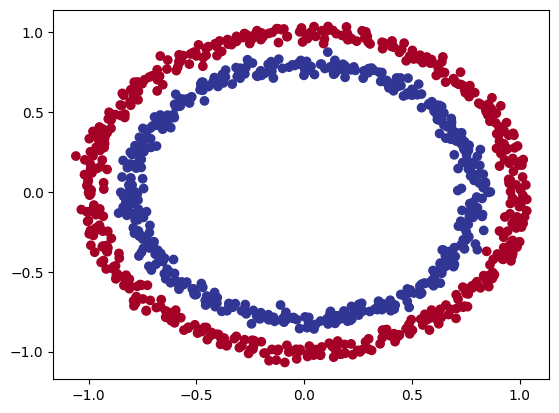

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 5.3752 - accuracy: 0.4330
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.7196 - accuracy: 0.4710
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.3748 - accuracy: 0.4680
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 3.4194 - accuracy: 0.4740
Epoch 5/5
32/32 [==============================] - 0s 968us/step - loss: 0.8045 - accuracy: 0.4920


In [11]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 839us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing. So let's step thins up a notch and add and extra layer.

In [12]:
# Set the rando seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 968us/step - loss: 0.6949 - accuracy: 0.5000


[0.6948535442352295, 0.5]

In [14]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improve our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer epochs)

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 968us/step - loss: 0.6940 - accuracy: 0.5000


[0.6940073370933533, 0.5]

To visualize our model's predictions, let's crate a function `plot_decision_boundry`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model prediction on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them reaady for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 711us/step
doing multiclass classification


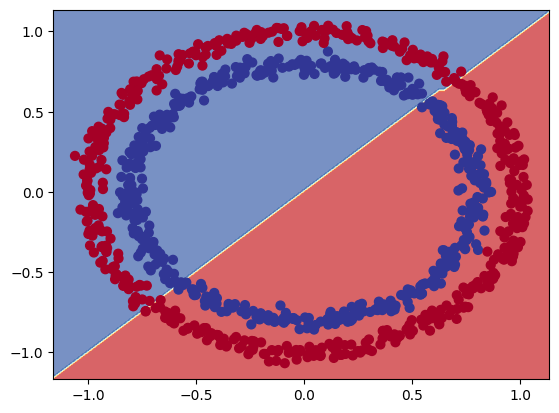

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model_3,
                       X,
                       y)

In [19]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: -6911.9702 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: -7145.8501 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: -7159.3081 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Oh wait... we compiled our model for a binary classification problem.
But... we're now working on a regression problem, let's change the model to suit our data.

In [20]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 586.8932 - mae: 586.8932
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 429.3319 - mae: 429.3319
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 310.9656 - mae: 310.9656
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 258.3056 - mae: 258.3056
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 262.4191 - mae: 262.4191
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 272.5313 - mae: 272.5313
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 263.6738 - mae: 263.6738
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 254.9588 - mae: 254.9588
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 258.4556 - mae: 258.4556
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 257.6824 - mae: 257.6824
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 2ms/step


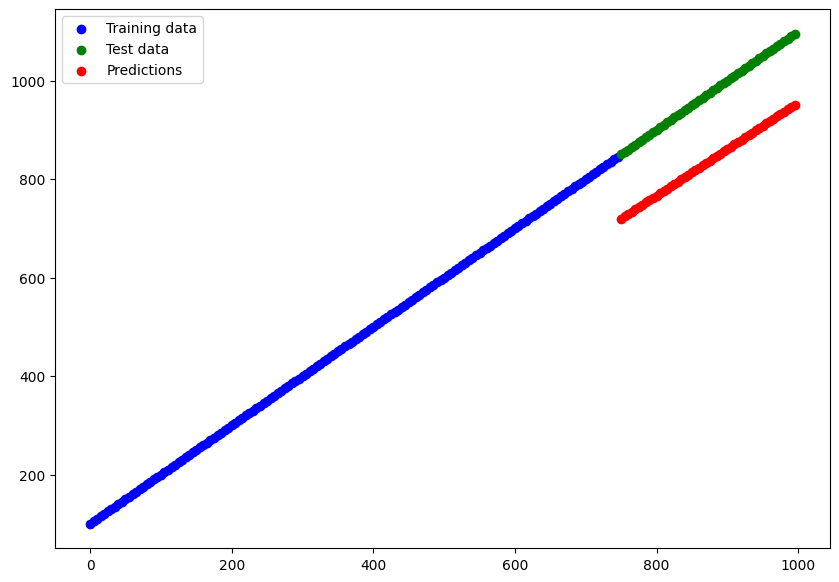

In [21]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Crete the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1722 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 903us/step - loss: 5.0131 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 870us/step - loss: 4.8046 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6164 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5457 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 839us/step - loss: 4.5229 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 903us/step - loss: 4.5179 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 871us/step - loss: 4.5133 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 935us/step - loss: 4.5095 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 903us/step - loss: 4.5059 - accuracy: 0.

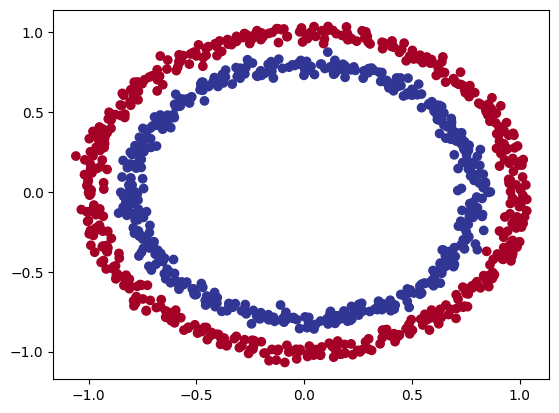

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 728us/step
doing binary classification


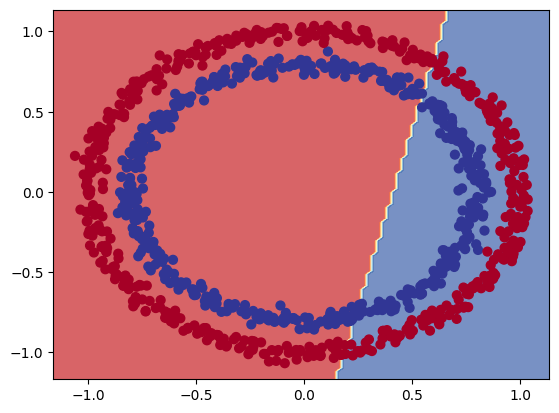

In [24]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4,
                       X, y)

Let's try build our first neural network with non-linear activation function

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.3061 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1962 - accuracy: 0.4510
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0933 - accuracy: 0.4360
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0608 - accuracy: 0.4360
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0535 - accuracy: 0.4360
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0510 - accuracy: 0.4350
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0490 - accuracy: 0.4350
Epoch 8/100
32/32 [==============================] - 0s 903us/step - loss: 4.0304 - accuracy: 0.4330
Epoch 9/100
32/32 [==============================] - 0s 903us/step - loss: 4.0212 - accuracy: 0.4320
Epoch 10/100
32/32 [==============================] - 0s 935us/step - loss: 4.0188 - accuracy: 0.4310
Epo

In [30]:
# Time to replicate the multi-layer neural network form TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 2.0671 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 968us/step - loss: 1.1849 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 1.0881 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0183 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9619 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9154 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8786 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8488 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8252 - accuracy: 0.4960
Epoch 10/250
32/32 [==============================] - 0s 1000us/step - loss: 0.8050 - accuracy: 0.4680
Epoc

In [31]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 839us/step - loss: 0.1024 - accuracy: 0.9820


[0.10241396725177765, 0.9819999933242798]

313/313 [==============================] - 0s 821us/step
doing binary classification


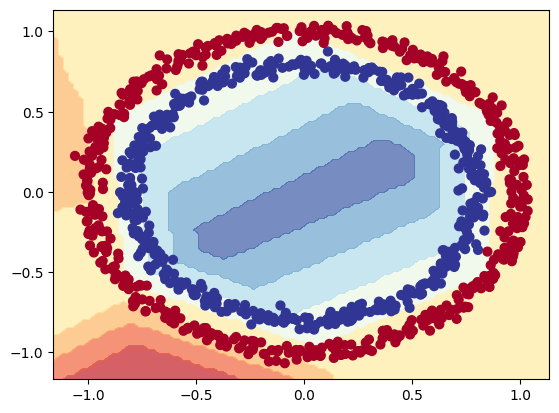

In [32]:
# Hoe do our model predictions look?
plot_decision_boundary(model_6, X,y)

In [40]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y , epochs=2500)

Epoch 1/2500
32/32 [==============================] - 1s 1ms/step - loss: 0.7311 - accuracy: 0.4910
Epoch 2/2500
32/32 [==============================] - 0s 968us/step - loss: 0.7177 - accuracy: 0.4900
Epoch 3/2500
32/32 [==============================] - 0s 1000us/step - loss: 0.7101 - accuracy: 0.4840
Epoch 4/2500
32/32 [==============================] - 0s 968us/step - loss: 0.7059 - accuracy: 0.4860
Epoch 5/2500
32/32 [==============================] - 0s 968us/step - loss: 0.7031 - accuracy: 0.4860
Epoch 6/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.4770
Epoch 7/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.4820
Epoch 8/2500
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4820
Epoch 9/2500
32/32 [==============================] - 0s 1000us/step - loss: 0.6972 - accuracy: 0.4840
Epoch 10/2500
32/32 [==============================] - 0s 1000us/step - loss: 0.6963 - a

In [41]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 871us/step - loss: 0.0160 - accuracy: 0.9980


[0.01600516214966774, 0.9980000257492065]

313/313 [==============================] - 0s 816us/step
doing binary classification


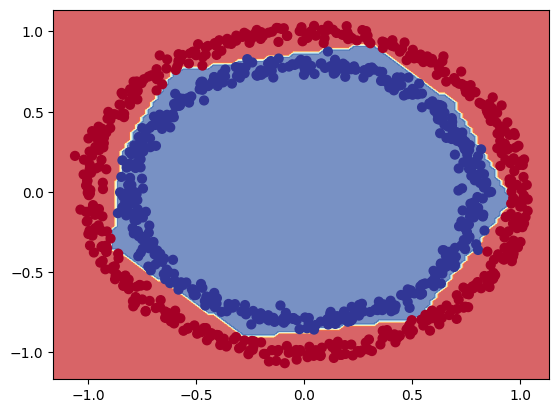

In [42]:
plot_decision_boundary(model_7, X, y)

In [44]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

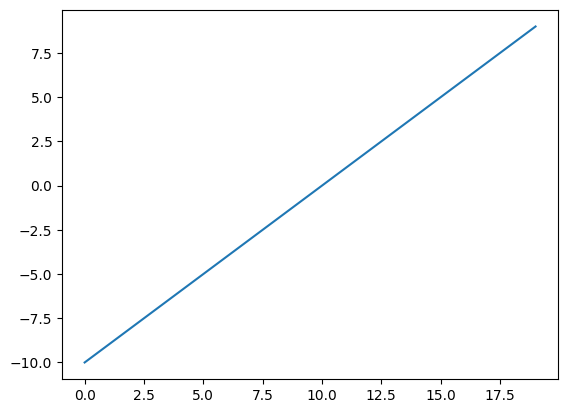

In [45]:
# Visualize our toy tensor
plt.plot(A);

In [46]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

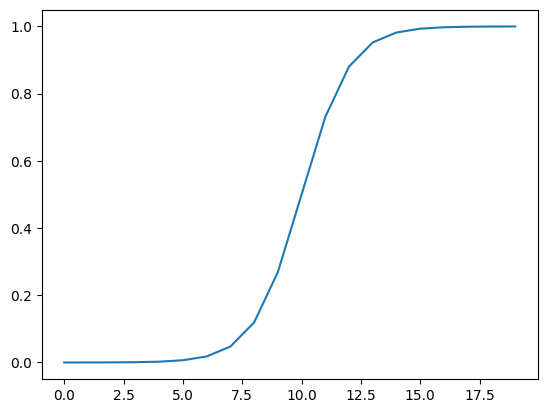

In [49]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [51]:
# Let's recreate relu function
def relu(x):
    return tf.maximum(x, 0)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

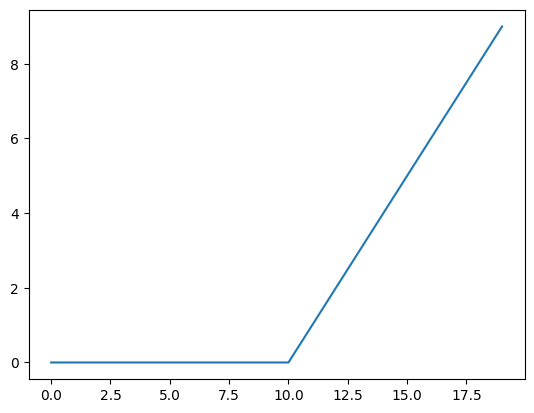

In [53]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [57]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

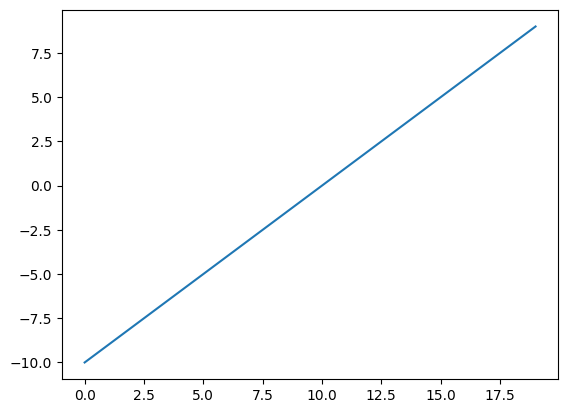

In [59]:
plt.plot(tf.keras.activations.linear(A));

In [60]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>